In [3]:
from diagrams.aws.compute import EC2, ElasticContainerService, Lambda, EC2Instance
from diagrams.aws.database import Dynamodb
from diagrams.aws.devtools import CommandLineInterface
from diagrams.aws.integration import StepFunctions
from diagrams.aws.management import Cloudformation, Cloudwatch
from diagrams.aws.ml import Sagemaker
from diagrams.aws.network import APIGateway
from diagrams.aws.compute import EC2ContainerRegistry
from diagrams.aws.storage import S3
from diagrams.onprem.ci import GithubActions
from diagrams.onprem.client import Users
from diagrams.onprem.registry import Jfrog
from diagrams.onprem.vcs import Github
from diagrams.programming.framework import React
from diagrams.programming.language import Csharp, Go, Python, Rust, TypeScript, NodeJS
from diagrams.saas.chat import Slack
from diagrams.saas.logging import Datadog
from diagrams.programming.language import Bash
from diagrams.custom import Custom
from diagrams.generic.storage import Storage
from diagrams.onprem.container import Docker
from diagrams.generic.os import Debian
from diagrams.aws.security import SecretsManager, KMS
from diagrams.onprem.security import Vault
from diagrams import Diagram, Cluster

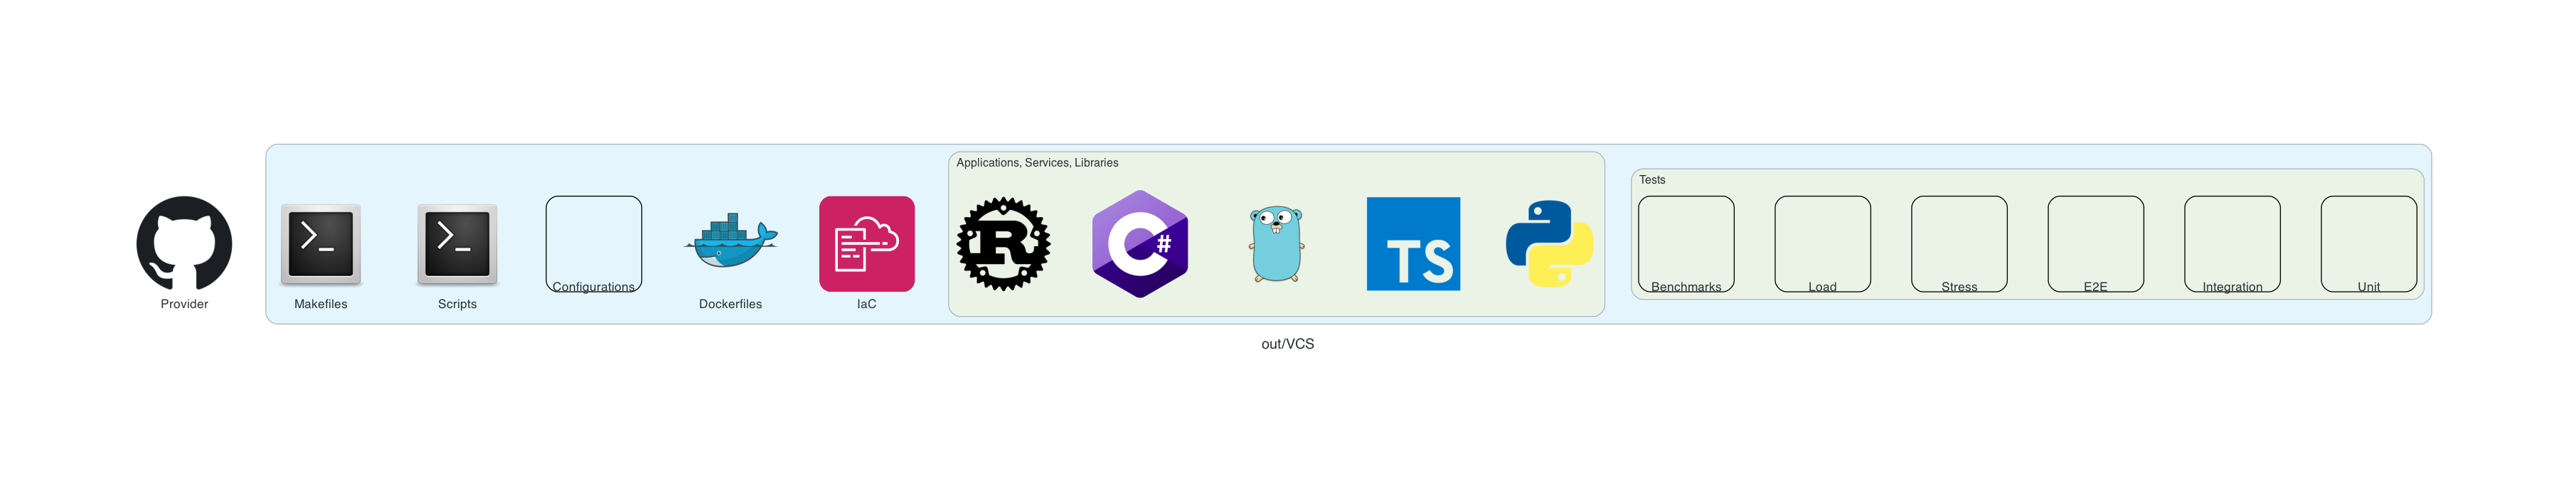

In [4]:
with Diagram("out/VCS", show=False, direction="TB") as diag:
    gh = Github("Provider")

    with Cluster(""):
        with Cluster("Applications, Services, Libraries"):
            langs = [
                Python(),
                TypeScript(),
                Go(),
                Csharp(),
                Rust(),
            ]

        with Cluster("Tests"):
            tests = [
                Custom("Unit", icon_path=""),
                Custom("Integration", icon_path=""),
                Custom("E2E", icon_path=""),
                Custom("Stress", icon_path=""),
                Custom("Load", icon_path=""),
                Custom("Benchmarks", icon_path=""),
            ]

        iac = Cloudformation("IaC")
        dockerfiles = Docker("Dockerfiles")
        configurations = Custom("Configurations", icon_path="")
        scripts = Bash("Scripts")
        makefiles = Bash("Makefiles")

diag

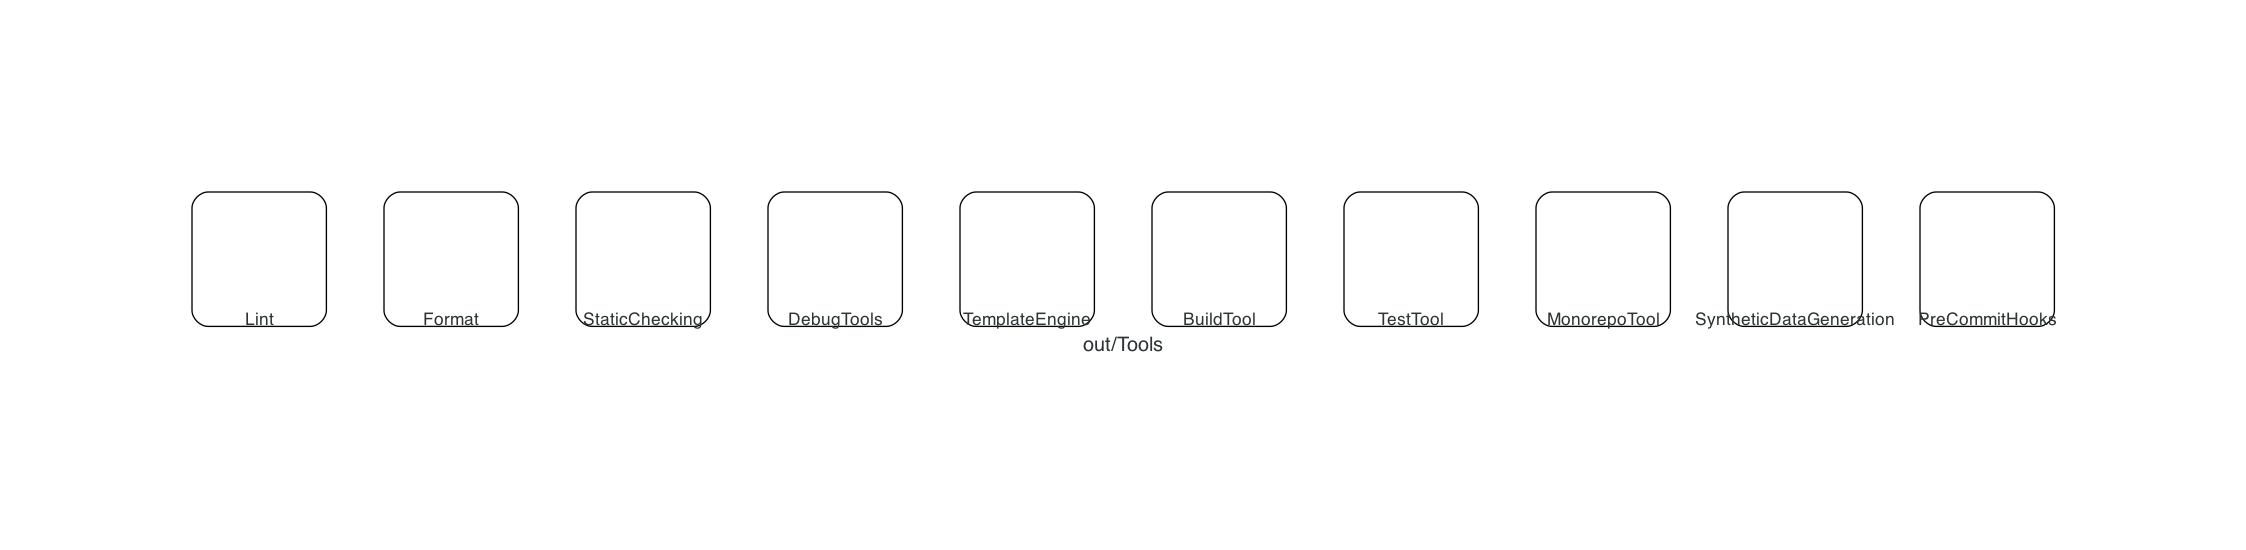

In [5]:
with Diagram("out/Tools", show=False, direction="TB") as diag:
    tools = [
        Custom("Lint", icon_path=""),
        Custom("Format", icon_path=""),
        Custom("StaticChecking", icon_path=""),
        Custom("DebugTools", icon_path=""),
        Custom("TemplateEngine", icon_path=""),
        Custom("BuildTool", icon_path=""),
        Custom("TestTool", icon_path=""),
        Custom("MonorepoTool", icon_path=""),
        Custom("SyntheticDataGeneration", icon_path=""),
        Custom("PreCommitHooks", icon_path=""),
    ]

diag

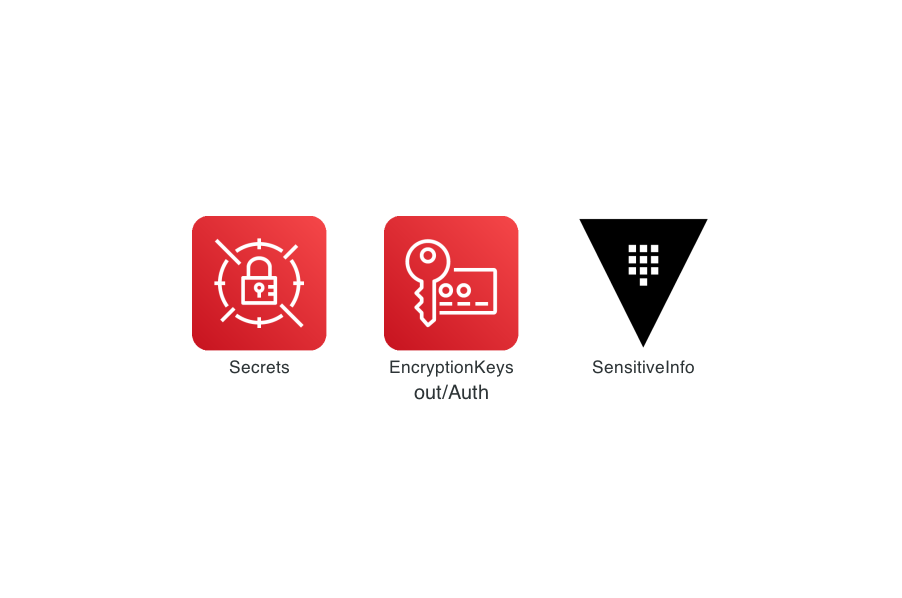

In [6]:
with Diagram("out/Auth", show=False, direction="TB") as diag:
    SecretsManager("Secrets")
    KMS("EncryptionKeys")
    Vault("SensitiveInfo")

diag

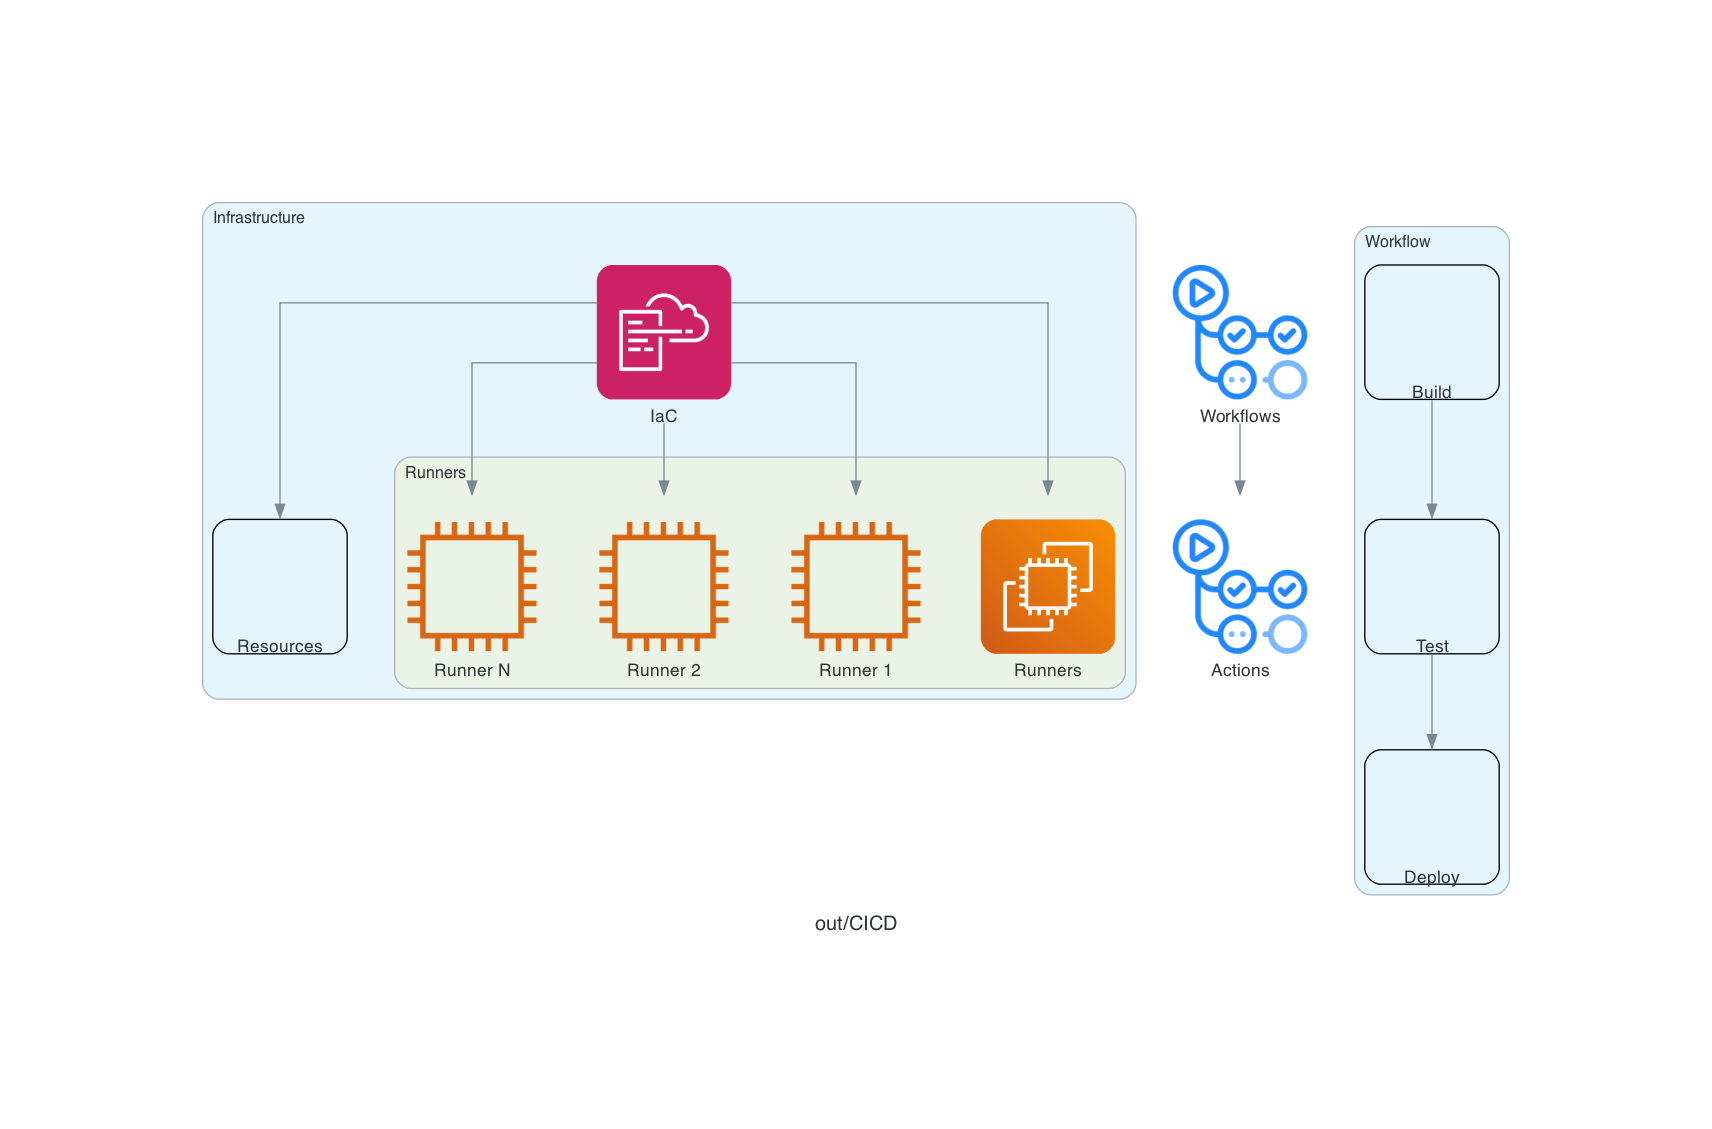

In [7]:
with Diagram("out/CICD", show=False, direction="TB") as diag:
    with Cluster("Infrastructure"):
        resources = Custom("Resources", icon_path="")

        cf = Cloudformation("IaC")
        with Cluster("Runners"):
            runners = [
            EC2("Runners"),
            EC2Instance("Runner 1"),
            EC2Instance("Runner 2"),
            EC2Instance("Runner N"),
            ]
    
    cf >> runners
    cf >> resources
    workflows = GithubActions("Workflows")
    actions = GithubActions("Actions")

    with Cluster("Workflow"):
        build = Custom("Build", icon_path="")
        test = Custom("Test", icon_path="")
        deploy = Custom("Deploy", icon_path="")

workflows >> actions
build >> test >> deploy

diag

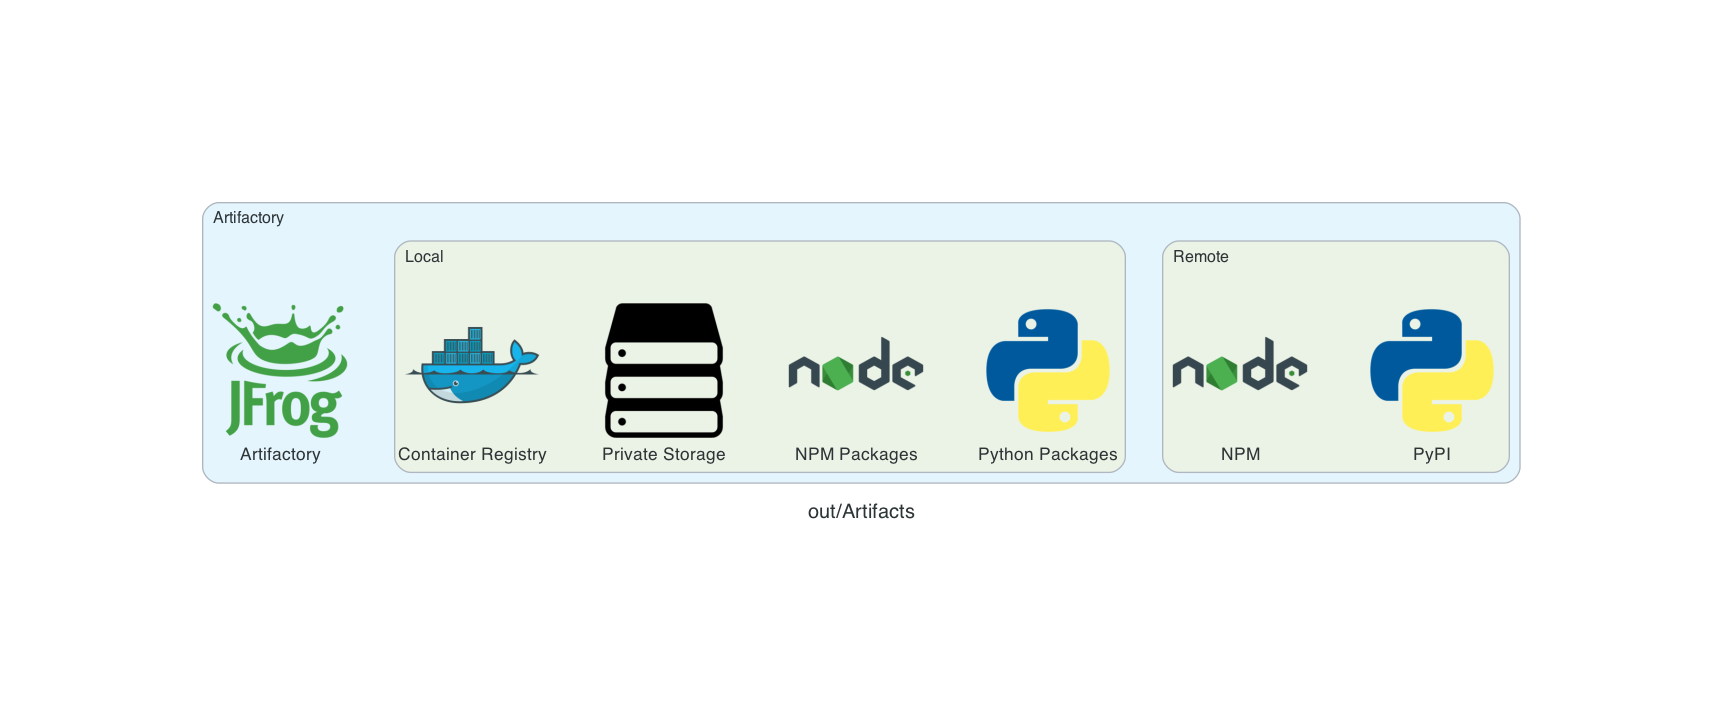

In [8]:
with Diagram("out/Artifacts", show=False, direction="TB") as diag:
    with Cluster("Artifactory"):
        Jfrog("Artifactory")

        with Cluster("Remote"):
            Python("PyPI")
            NodeJS("NPM")
        
        with Cluster("Local"):
            Python("Python Packages")
            NodeJS("NPM Packages")
            Storage("Private Storage")
            Docker("Container Registry")

diag

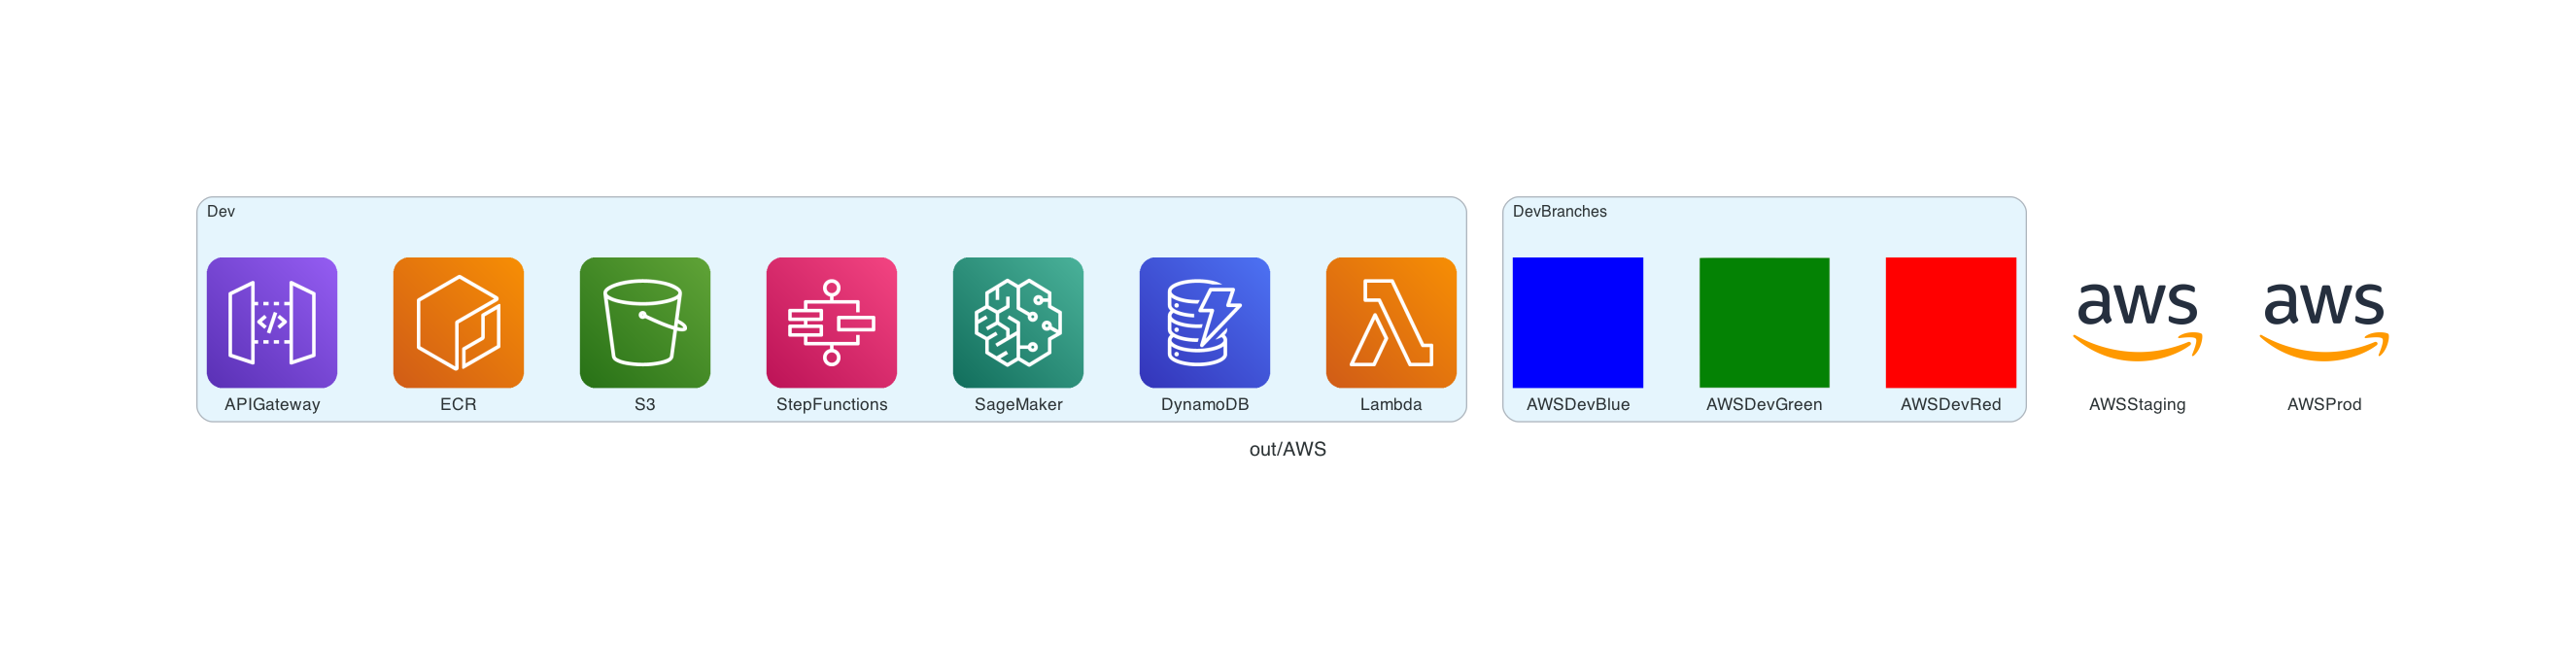

In [9]:
with Diagram("out/AWS", show=False, direction="TB") as diag:
    with Cluster("Dev"):
        Lambda("Lambda")
        Dynamodb("DynamoDB")
        Sagemaker("SageMaker")
        StepFunctions("StepFunctions")
        S3("S3")
        EC2ContainerRegistry("ECR")
        APIGateway("APIGateway")
    
    with Cluster("DevBranches"):
        Custom("AWSDevRed", icon_path="../assets/red.png")
        Custom("AWSDevGreen", icon_path="../assets/green.png")
        Custom("AWSDevBlue", icon_path="../assets/blue.png")

    Custom("AWSStaging", icon_path="../assets/aws.png")
    Custom("AWSProd", icon_path="../assets/aws.png")
diag

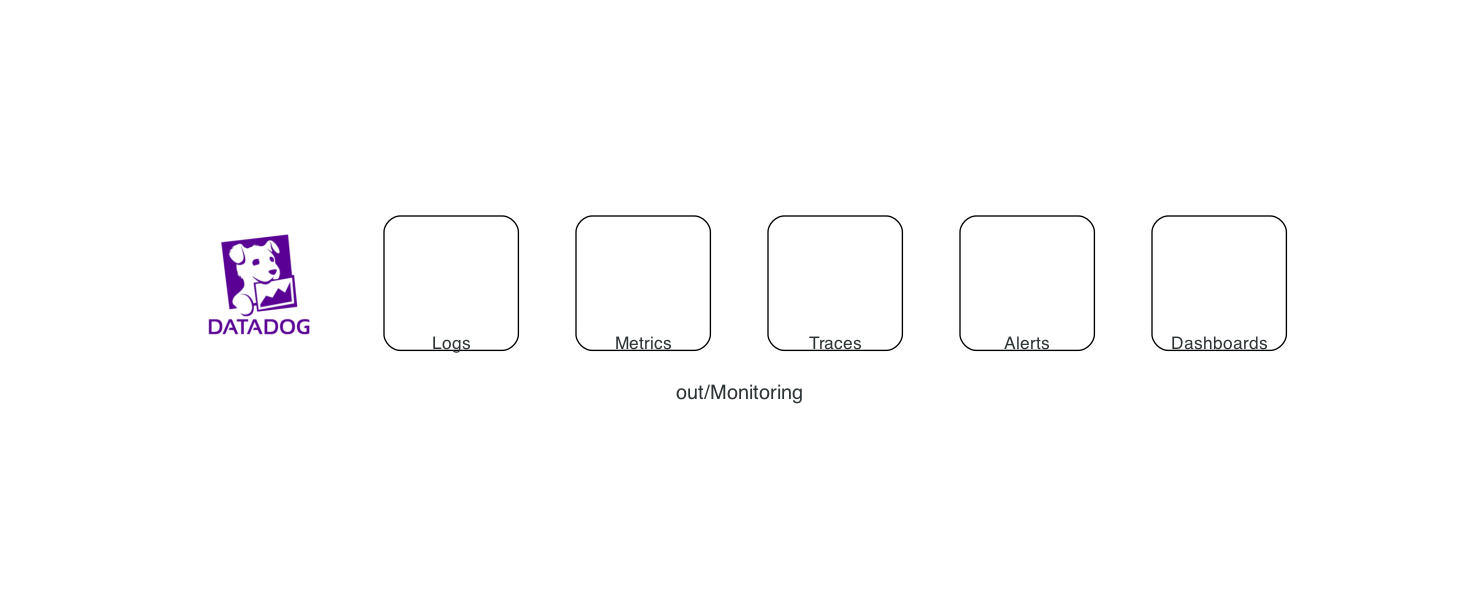

In [10]:
with Diagram("out/Monitoring", show=False, direction="TB") as diag:
    Datadog()
    Custom("Logs", icon_path="")
    Custom("Metrics", icon_path="")
    Custom("Traces", icon_path="")
    Custom("Alerts", icon_path="")
    Custom("Dashboards", icon_path="")
diag